In [1]:
using Pkg
using Distributions
using ForwardDiff
using LinearAlgebra
using Optim
using Plots
using Random
using SSM

ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.


In [71]:
Random.seed!(1234)
g = 9.81
l=1
# time differential
dt = 0.01
# transition matrix
A = Matrix{Float64}([1.0 dt; -g/l*dt 1.0])
# Initial state
x0 = [0.0, 1.0]
# Define the LDS model parameters
C = Matrix{Float64}(I(2))  # Observation matrix (assuming direct observation)
Q = Matrix{Float64}(0.01 * I(2))  # Process noise covariance
observation_noise_std = 0.5
R = Matrix{Float64}((observation_noise_std^2) * I(2))  # Observation noise covariance
P0 = Matrix{Float64}(0.1*I(2))  # Initial state covariance

lds = SSM.GaussianLDS(;A=A, C=C, Q=Q, R=R, x0=x0, P0=P0, obs_dim=2, latent_dim=2, fit_bool=[true, true, false, false, false, false])

x, y = SSM.sample(lds, 3, 100)

([-0.11375626857646887 -0.05829349566953871 … 0.38927459888641114 0.2173556424880684; 0.08636962409220832 0.17229877647874417 … -0.09803188144997227 -0.26064832455995357; -0.40419148225790374 -0.4716866586875218 … 0.7760896897932896 0.7400206668610536;;; 1.343805512755226 1.2863979124749656 … 0.060924881414345565 0.0922845673904967; 1.2574429944088954 1.311690151729842 … -4.967087227356013 -4.752908806208653; 1.0663290288102212 0.9991557402087972 … -0.3161358702443062 -0.3787744645208135], [-0.32355107704589325 0.9690880323624795 … -0.039807549312631696 0.20445211038157346; -0.761507298116886 0.83127848561833 … -0.31780124772466345 -0.594379254422013; -0.014641309999509522 0.40295018364870594 … 0.8159851655197249 0.35091332018487326;;; 1.7032604814881955 1.4488442771984236 … 0.06407608359556304 -0.0018833125233974485; 1.4598270976348098 1.529345331462266 … -4.952021369299665 -5.010392358507745; 1.7553734632922575 -0.0001586319709279138 … -1.4092392926702373 -0.1981923730126964])

In [72]:
x_smooth, p_smooth, off_diags = SSM.smooth(lds, y)

([-0.12707975276822364 -0.11729631582924958 … 0.3465653283138288 0.3386174371376887; 0.14454061101087523 0.21357414661475518 … -0.21441599734843675 -0.27733639397330884; -0.04777740073752734 -0.049089404040271734 … 1.0373143418579578 1.0070498171224078;;; 1.3113207579443449 1.339275066249993 … -0.25812781058954004 -0.28096269403659857; 1.429578554041173 1.456599656260743 … -5.02386822069239 -5.003124717012326; 0.9049928716262423 0.8662675174547677 … -0.4019064858048561 -0.49191799775156697], [0.02997425975735998 0.02778713623739736 … 0.03736433760488541 0.0440731042944332; 0.02997425975735998 0.02778713623739736 … 0.03736433760488541 0.0440731042944332; 0.02997425975735998 0.02778713623739736 … 0.03736433760488541 0.0440731042944332;;; 0.004336333100060944 0.00297468446241285 … -0.004945117613032814 -0.007583462230285051; 0.004336333100060944 0.00297468446241285 … -0.004945117613032814 -0.007583462230285051; 0.004336333100060944 0.00297468446241285 … -0.004945117613032814 -0.0075834622

In [86]:
x_smooth[3, 1, :]

2-element Vector{Float64}:
 -0.04777740073752734
  0.9049928716262423

In [87]:
mean([x_smooth[1, 1, :], x_smooth[2, 1, :], x_smooth[3, 1, :]])

2-element Vector{Float64}:
 -0.010105514164958584
  1.2152973945372534

In [102]:
lls = fit!(lds, y, max_iter=100, tol=1e-3)

Fitting LDS via EM... 100%|██████████████████████████████| Time: 0:00:00


100-element Vector{Float64}:
 356.79829938011324
 356.81980104242746
 356.8411491713972
 356.8623459449027
 356.8833934948381
 356.9042939083861
 356.92504922925866
 356.9456614589011
 356.96613255764504
 356.9864644458228
   ⋮
 358.30786609643206
 358.32086388871073
 358.33380545420016
 358.34669127764687
 358.35952183756245
 358.37229760631385
 358.3850190502452
 358.3976866297595
 358.4103007994424

In [49]:
lds.state_model.x0

2-element Vector{Float64}:
 0.0
 1.0

In [16]:
# write each y to a csv file
using CSV
using DataFrames

for i in 1:3
    CSV.write("/home/ryansenne/Desktop/data$i.csv", DataFrame(y[i, :, :], :auto))
end

In [15]:
y[1, :, :]

100×2 Matrix{Float64}:
 -0.323551    1.70326
  0.969088    1.44884
 -0.498399    1.78164
 -0.331751    1.01118
 -0.0652428   0.850834
 -1.03334     1.5051
 -0.315437    0.772258
 -0.167026    1.82909
  0.438854    1.52128
 -0.777171    1.10948
  ⋮          
  0.956269   -0.774274
  1.31636    -0.506619
  0.204983    0.285933
  0.374959   -0.613604
  0.422337    0.083254
  0.527896   -0.225842
  0.277655   -0.400379
 -0.0398075   0.0640761
  0.204452   -0.00188331

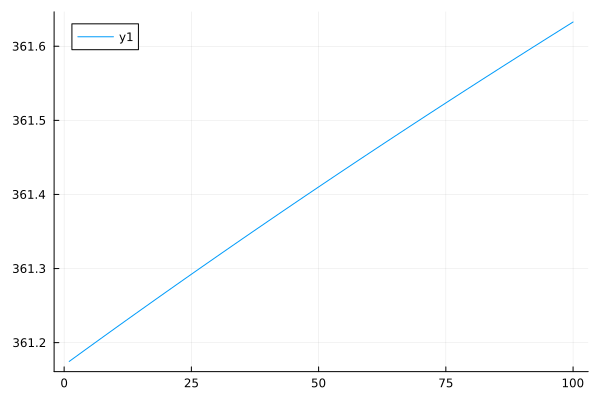

In [38]:
plot(lls)

In [18]:
lds.state_model.Q

2×2 Matrix{Float64}:
 0.0100715   0.00704897
 0.00704897  0.00493425

In [79]:
# test out the LDS model
lds_old = SSM.LDS(;A=A, H=C, Q=Q, R=R, x0=x0, p0=P0, obs_dim=2, latent_dim=2)

# KalmanFilterEM!(lds_old, y[1, :, :], 1, 1e-3, RTSSmoothing())

LDS([1.0 0.01; -0.0981 1.0], [1.0 0.0; 0.0 1.0], [0.0; 0.0;;], [0.01 0.0; 0.0 0.01], [0.25 0.0; 0.0 0.25], [0.0, 1.0], [0.1 0.0; 0.0 0.1], [0.0;;], 2, 2, Bool[1, 1, 1, 1, 1, 1, 1])

In [78]:
lds_old.x0

2-element Vector{Float64}:
 -0.1270797527682236
  1.311320757944344

In [82]:
x, p_smooth, inverse_offdiag = SSM.DirectSmoother(lds_old, y[3, :, :])

([-0.04777740073752734 0.9049928716262423; -0.049089404040271734 0.8662675174547677; … ; 1.0373143418579578 -0.4019064858048561; 1.0070498171224078 -0.49191799775156697], [0.02997425975735998 0.004336333100060944; 0.02778713623739736 0.00297468446241285; … ; 0.03736433760488541 -0.004945117613032814; 0.0440731042944332 -0.007583462230285051;;; 0.004336333100060944 0.03230247103856569; 0.00297468446241285 0.02988592579621252; … ; -0.004945117613032814 0.040343522341738; -0.007583462230285051 0.04814472469529661], [0.0 0.0; 0.02427920404227143 0.0020603290423333565; … ; 0.03035141007521449 -0.005801219493208781; 0.03587969848918758 -0.008279383780838527;;; 0.0 0.0; 0.00472901824481268 0.02639872610250525; … ; -0.0024822724610134507 0.03295674904757299; -0.004367002297707153 0.039258306134208186], 744.851164086406)